1. Import Library
Kode ini mengimpor tensorflow (untuk membuat model neural network), Sequential dari tensorflow.keras.models (untuk membuat model lapisan ANN secara berurutan), dan lapisan-lapisan dasar seperti Dense dan Flatten dari tensorflow.keras.layers.
to_categorical digunakan untuk mengubah label menjadi bentuk one-hot encoding.
confusion_matrix dari sklearn.metrics untuk menghitung confusion matriks.
matplotlib.pyplot dan seaborn digunakan untuk visualisasi confusion matriks.

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


2. Memuat Dataset MNIST
Dataset telah disediakan langsung oleh tensorflow.keras.datasets, dan dataset dibagi menjadi dua bagian:
- X_train dan y_train: data dan label untuk pelatihan model.
- X_test dan y_test: data dan label untuk menguji performa model.

In [20]:
# Load dataset MNIST
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()


3. Pra-Pengolahan dan Pemilihan Fitur

- Normalisasi Data:
Semua nilai piksel gambar dalam data latih dan data uji diubah menjadi rentang [0, 1] dengan membagi setiap nilai piksel dengan 255.0. Normalisasi ini membantu dalam mempercepat proses pembelajaran model dan mencegah nilai besar yang bisa menghambat proses konvergensi.

- One-Hot Encoding:
Label digit asli (0 hingga 9) dikonversi menjadi bentuk one-hot encoding.

In [21]:
# Pra Pengolahan dan Pemilihan Fitur
# Normalisasi pixel gambar agar berada dalam rentang 0-1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Konversi label ke dalam bentuk one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


4. Membangun Arsitektur Model ANN (Multilayer Perceptron / MLP)<br>
Flatten Layer:
Layer pertama adalah Flatten, yang mengubah input 2D (gambar 28x28) menjadi vektor 1D dengan panjang 784 (28 * 28). Proses ini diperlukan karena layer Dense menerima input berbentuk 1D.

Hidden Layers:
Dua layer tersembunyi (Dense) digunakan dalam arsitektur ini:
- Layer pertama memiliki 128 neuron dan menggunakan fungsi aktivasi ReLU.
- Layer kedua memiliki 64 neuron dan juga menggunakan fungsi aktivasi ReLU.

ReLU (Rectified Linear Unit) digunakan untuk memperkenalkan non-linearitas ke dalam jaringan dan membantu model dalam belajar pola yang lebih kompleks. ReLU mengubah input negatif menjadi nol dan mempertahankan input positif seperti apa adanya.

Output Layer:
Layer terakhir adalah layer Dense dengan 10 neuron dan fungsi aktivasi softmax. Softmax digunakan karena ini adalah klasifikasi multi-kelas. Fungsi ini menghasilkan distribusi probabilitas untuk masing-masing kelas digit (0-9).

In [22]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Mengubah input 2D menjadi 1D
    Dense(128, activation='relu'),  # Hidden layer dengan 128 neuron dan fungsi aktivasi ReLU
    Dense(64, activation='relu'),   # Hidden layer dengan 64 neuron
    Dense(10, activation='softmax') # Layer output dengan 10 neuron dan fungsi aktivasi softmax
])


c:\Users\cfath\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5. Kompilasi Model 
Model dikompilasi dengan:
- optimizer='adam': Optimizer ADAM digunakan untuk mempercepat proses pelatihan. Adam dipilih karena efektif dan cepat untuk pelatihan model deep learning dengan sedikit kebutuhan penyetelan manual.
- loss='categorical_crossentropy': Cross-entropy digunakan sebagai loss function untuk klasifikasi multi-kelas.
- metrics=['accuracy']: Akurasi digunakan sebagai metrik evaluasi performa model selama pelatihan.

In [23]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


6. Pelatihan Model
Model dilatih menggunakan data latih (X_train, y_train) dengan parameter:
- epochs=10: Model akan melewati seluruh data sebanyak 10 kali.
- batch_size=128: Setiap batch berisi 128 sampel.
- validation_data=(X_test, y_test): Menggunakan data uji untuk menghitung akurasi validasi di setiap epoch.

In [24]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
print("Final Training Accuracy: {:.2f}%".format(train_accuracy[-1] * 100))
print("Final Validation Accuracy: {:.2f}%".format(val_accuracy[-1] * 100))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8273 - loss: 0.6067 - val_accuracy: 0.9567 - val_loss: 0.1491
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9583 - loss: 0.1434 - val_accuracy: 0.9652 - val_loss: 0.1149
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9703 - loss: 0.0981 - val_accuracy: 0.9724 - val_loss: 0.0904
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9789 - loss: 0.0706 - val_accuracy: 0.9738 - val_loss: 0.0837
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9839 - loss: 0.0541 - val_accuracy: 0.9767 - val_loss: 0.0758
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9870 - loss: 0.0430 - val_accuracy: 0.9758 - val_loss: 0.0781
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9884 - loss: 0.0373 - val_accuracy: 0.9768 - val_loss: 0.0768
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9915 - loss: 0.0277 - val_accuracy: 0.

7. Prediksi dan Evaluasi dengan Confusion Matrix
Setelah pelatihan, model memprediksi label untuk data uji (X_test).
Confusion Matrix:
- Confusion matrix dibangun untuk melihat jumlah prediksi benar dan salah bagi setiap digit.
- Matriks ini divisualisasikan menggunakan seaborn untuk memudahkan interpretasi.
- Baris pada confusion matrix menunjukkan label aktual, sementara kolom menunjukkan label prediksi.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


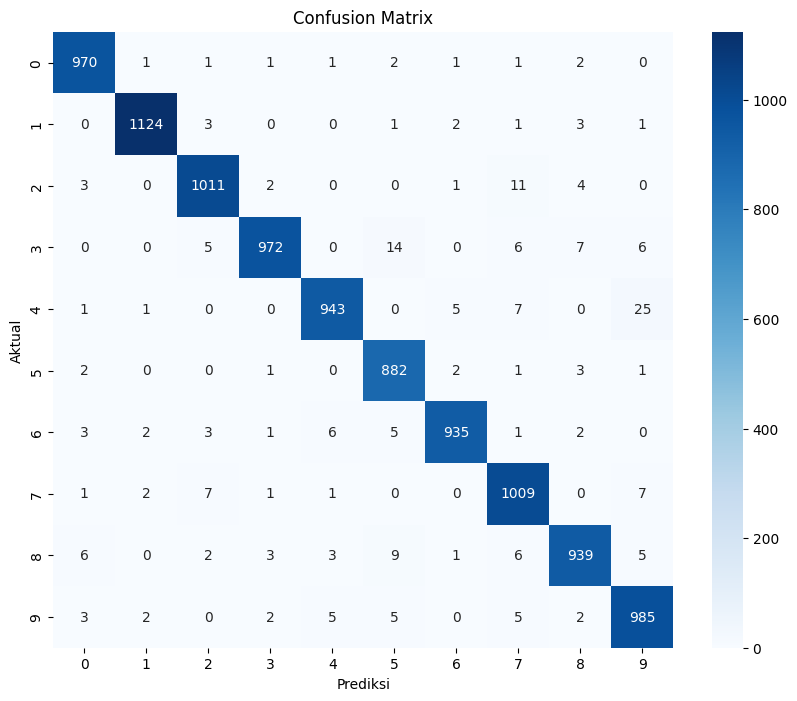

In [26]:
# Prediksi label pada data uji
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Visualisasi confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()


Model ANN (Multilayer Perceptron) ini mencapai akurasi tinggi pada dataset MNIST, dengan 99.29% pada data latih dan 97.70% pada data uji. model ini menunjukkan kemampuannya yang baik dalam mengenali pola digit. Berdasarkan confusion matrix yang ditampilkan, sebagian besar digit dikenali dengan akurasi tinggi, namun terdapat beberapa kesalahan kecil pada digit yang mirip, seperti 3 dan 5, 4 dan 9, 5 dan 3, 7 dan 2, juga 9 dan 8. Dengan dua hidden layer (128 dan 64 neuron), model ini sudah cukup optimal untuk menangani dataset ini tanpa overfitting yang berarti. Arsitektur sederhana ini efektif dan cocok untuk aplikasi klasifikasi digit tanpa memerlukan kompleksitas tambahan.